In [1]:
##subir el archivo desde tu computador
from google.colab import files
uploaded = files.upload()

Saving Base de datos Casen 2022 SPSS_18 marzo 2024.sav to Base de datos Casen 2022 SPSS_18 marzo 2024.sav


In [62]:
##paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.9 MB/s eta 0:00:00


In [5]:
import pyreadstat

In [63]:
##data base
archivo = list(uploaded.keys())[0]
print(f"cargando archivo: {archivo}")
df, meta = pyreadstat.read_sav(archivo)
print(f"\nbase cargada")
print(f"dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")

cargando archivo: Base de datos Casen 2022 SPSS_18 marzo 2024.sav

base cargada
dimensiones: 202,231 filas x 918 columnas


In [65]:
##verificar codigo de región metropolitana
print(" regiones disponibles en la base:")
print(df['region'].value_counts().sort_index())
df_santiago = df[df['region'] == 13].copy()
print(f"\n registros totales en la base: {len(df):,}")
print(f" registros en Santiago (RM): {len(df_santiago):,}")
print(f" porcentaje de la muestra: {(len(df_santiago)/len(df)*100):.1f}%")

 regiones disponibles en la base:
region
1.0      8691
2.0      9029
3.0      9011
4.0      8236
5.0     20552
6.0     13864
7.0     13739
8.0     19914
9.0     13577
10.0    10707
11.0     3747
12.0     5029
13.0    38674
14.0    10603
15.0     8152
16.0     8706
Name: count, dtype: int64

 registros totales en la base: 202,231
 registros en Santiago (RM): 38,674
 porcentaje de la muestra: 19.1%


In [66]:
##codigos de parentesco disponibles
print("codigos de parentesco (pco1):")
print(df_santiago['pco1'].value_counts().sort_index())
##etiquetas si estan disponibles
if 'pco1' in meta.column_names_to_labels:
    print(f"\netiqueta de la variable: {meta.column_names_to_labels['pco1']}")
##etiquetas de valores si estan disponibles
if 'pco1' in meta.variable_value_labels:
    print("\nsignificado de los codigos:")
    for codigo, etiqueta in meta.variable_value_labels['pco1'].items():
        print(f"  {codigo}: {etiqueta}")

codigos de parentesco (pco1):
pco1
1.0     13202
2.0      6912
3.0        75
4.0      7180
5.0      5672
6.0       445
7.0       776
8.0       183
9.0       448
10.0     1936
11.0      622
12.0      124
13.0      715
14.0      317
15.0       67
Name: count, dtype: int64

etiqueta de la variable: pco1. Jefatura de hogar y relación con jefatura de hogar

significado de los codigos:
  1.0: 1. Jefatura de Hogar
  2.0: 2. Esposo(a) o pareja de distinto sexo
  3.0: 3. Esposo(a) o pareja de igual sexo
  4.0: 4. Hijo(a) de ambos
  5.0: 5. Hijo(a) sólo de la jefatura
  6.0: 6. Hijo(a) sólo del esposo(a)/pareja
  7.0: 7. Padre o madre
  8.0: 8. Suegro(a)
  9.0: 9. Yerno o nuera
  10.0: 10. Nieto(a)
  11.0: 11. Hermano(a)
  12.0: 12. Cuñado(a)
  13.0: 13. Otro Familiar
  14.0: 14. No familiar
  15.0: 15. Servicio Doméstico puertas adentro


In [67]:
##codigos de nivel educacional
print("codigos de nivel educacional (e6a):")
print(df_santiago['e6a'].value_counts().sort_index())
##etiquetas de valores
if 'e6a' in meta.variable_value_labels:
    print("\nSignificado de los codigos:")
    for codigo, etiqueta in meta.variable_value_labels['e6a'].items():
        print(f"  {codigo}: {etiqueta}")
else:
    print("\n no hay etiquetas disponibles, trabajaremos con codigos numericos")

codigos de nivel educacional (e6a):
e6a
1.0     1404
2.0      161
3.0      482
4.0      846
5.0      278
6.0     1391
7.0     7621
8.0      928
9.0     9241
10.0     369
11.0    3381
12.0    3502
13.0    8058
14.0     891
15.0     121
Name: count, dtype: int64

Significado de los codigos:
  1.0: 1. Nunca asistió
  2.0: 2. Sala cuna
  3.0: 3. Jardín Infantil (Medio menor y Medio mayor)
  4.0: 4. Prekínder / Kínder (Transición menor y Transición Mayor)
  5.0: 5. Educación Especial (Diferencial)
  6.0: 6. Primaria o Preparatoria (Sistema antiguo)
  7.0: 7. Educación Básica
  8.0: 8. Humanidades (Sistema Antiguo)
  9.0: 9. Educación Media Científico-Humanista
  10.0: 10. Técnica, Comercial, Industrial o Normalista (Sistema Antiguo)
  11.0: 11. Educación Media Técnica Profesional
  12.0: 12. Técnico Nivel Superior (Carreras 1 a 3 años)
  13.0: 13. Profesional (Carreras 4 o más años)
  14.0: 14. Magíster o maestría
  15.0: 15. Doctorado


In [68]:
##IDENTIFICAR JEFES DE HOGAR (pco1 == 1)
jefes = df_santiago[df_santiago['pco1'] == 1.0][
    ['id_vivienda', 'e6a', 'esc', 'edad', 'sexo']
].copy()

##renombrar columnas para identificar que son del jefe/padre
jefes.columns = ['id_vivienda', 'e6a_padre', 'esc_padre', 'edad_padre', 'sexo_padre']

print(f" jefes de hogar identificados: {len(jefes):,}")

##IDENTIFICAR HIJOS
##códigos:  4 = Hijo(a) de ambos
##          5 = Hijo(a) sólo de la jefatura
##          6 = Hijo(a) sólo del esposo(a)/pareja
##filtrar hijos entre 18-40 años (ya completaron o estan completando educación)

hijos = df_santiago[
    (df_santiago['pco1'].isin([4.0, 5.0, 6.0])) &  # Códigos de hijo/a
    (df_santiago['edad'] >= 18) &                   # Mayores de edad
    (df_santiago['edad'] <= 40)                     # Hasta 40 años
][['id_vivienda', 'id_persona', 'e6a', 'esc', 'edad', 'sexo', 'pobreza', 'area']].copy()

print(f" hijos entre 18-40 años identificados: {len(hijos):,}")

##UNIR jefes con hijos por vivienda
df_movilidad = hijos.merge(jefes, on='id_vivienda', how='inner')

print(f"\n pares padre-hijo creados: {len(df_movilidad):,}")

##verificacion
print(f"\n distribución de edad de los hijos:")
print(df_movilidad['edad'].describe())

print(f"\n distribución de edad de los padres:")
print(df_movilidad['edad_padre'].describe())

print(f"\n primeras 10 filas del dataset:")
display(df_movilidad.head(10))

 jefes de hogar identificados: 13,202
 hijos entre 18-40 años identificados: 5,763

 pares padre-hijo creados: 6,020

 distribución de edad de los hijos:
count    6020.000000
mean       25.658638
std         5.793183
min        18.000000
25%        21.000000
50%        24.000000
75%        29.000000
max        40.000000
Name: edad, dtype: float64

 distribución de edad de los padres:
count    6020.000000
mean       55.159136
std         9.629311
min        19.000000
25%        49.000000
50%        55.000000
75%        61.000000
max        89.000000
Name: edad_padre, dtype: float64

 primeras 10 filas del dataset:


,id_vivienda,id_persona,e6a,esc,edad,sexo,pobreza,area,e6a_padre,esc_padre,edad_padre,sexo_padre
0,1001701.0,2.0,11.0,12.0,28.0,2.0,3.0,1.0,11.0,12.0,56.0,1.0
1,1001701.0,3.0,13.0,17.0,27.0,2.0,3.0,1.0,11.0,12.0,56.0,1.0
2,1001701.0,4.0,11.0,10.0,19.0,2.0,3.0,1.0,11.0,12.0,56.0,1.0
3,1002102.0,5.0,9.0,12.0,18.0,1.0,3.0,1.0,13.0,16.0,39.0,1.0
4,1002104.0,3.0,12.0,15.0,32.0,2.0,3.0,1.0,8.0,8.0,67.0,2.0
5,1002105.0,3.0,9.0,12.0,19.0,1.0,3.0,1.0,12.0,15.0,45.0,2.0
6,1002106.0,3.0,13.0,17.0,37.0,2.0,3.0,1.0,11.0,12.0,68.0,1.0
7,1002106.0,4.0,13.0,16.0,33.0,2.0,3.0,1.0,11.0,12.0,68.0,1.0
8,1002106.0,5.0,12.0,14.0,33.0,1.0,3.0,1.0,11.0,12.0,68.0,1.0
9,1002107.0,3.0,12.0,15.0,24.0,1.0,3.0,1.0,12.0,15.0,65.0,1.0


In [69]:
def categorizar_educacion(nivel_e6a):
    """
    Categoriza nivel educacional según códigos CASEN 2022

    Basado en los códigos reales:
    - Básica o menos: Nunca asistió, sala cuna, jardín, prekinder, especial, primaria, básica
    - Media: Humanidades, media científico-humanista, técnica antigua, media técnica profesional
    - Superior: Técnico superior, profesional, magíster, doctorado
    """
    if pd.isna(nivel_e6a):
        return 'Sin información'

    nivel_e6a = float(nivel_e6a)

    if nivel_e6a <= 7.0:
        return 'Básica o menos'

    elif nivel_e6a <= 11.0:
        return 'Media'

    elif nivel_e6a <= 15.0:
        return 'Superior'

    else:
        return 'Sin información'

##categorización
df_movilidad['educ_hijo_cat'] = df_movilidad['e6a'].apply(categorizar_educacion)
df_movilidad['educ_padre_cat'] = df_movilidad['e6a_padre'].apply(categorizar_educacion)

##verificación
print("=" * 60)
print(" DISTRIBUCIÓN EDUCACIÓN DE LOS HIJOS")
print("=" * 60)
conteo_hijos = df_movilidad['educ_hijo_cat'].value_counts()
porcentaje_hijos = df_movilidad['educ_hijo_cat'].value_counts(normalize=True) * 100

for categoria in ['Básica o menos', 'Media', 'Superior', 'Sin información']:
    if categoria in conteo_hijos.index:
        print(f"{categoria:20} {conteo_hijos[categoria]:>6,} ({porcentaje_hijos[categoria]:>5.1f}%)")

print(f"\n{'Total':20} {len(df_movilidad):>6,}")

print("\n" + "=" * 60)
print(" DISTRIBUCIÓN EDUCACIÓN DE LOS PADRES")
print("=" * 60)
conteo_padres = df_movilidad['educ_padre_cat'].value_counts()
porcentaje_padres = df_movilidad['educ_padre_cat'].value_counts(normalize=True) * 100

for categoria in ['Básica o menos', 'Media', 'Superior', 'Sin información']:
    if categoria in conteo_padres.index:
        print(f"{categoria:20} {conteo_padres[categoria]:>6,} ({porcentaje_padres[categoria]:>5.1f}%)")

print(f"\n{'Total':20} {len(df_movilidad):>6,}")

##verificación
print("\n" + "=" * 60)
print(" VERIFICACIÓN: Códigos e6a originales vs categorización")
print("=" * 60)
print("\nHIJOS:")
verif_hijos = pd.crosstab(
    df_movilidad['e6a'],
    df_movilidad['educ_hijo_cat'],
    margins=True
)
display(verif_hijos)

print("\nPADRES:")
verif_padres = pd.crosstab(
    df_movilidad['e6a_padre'],
    df_movilidad['educ_padre_cat'],
    margins=True
)
display(verif_padres)

 DISTRIBUCIÓN EDUCACIÓN DE LOS HIJOS
Básica o menos          267 (  4.4%)
Media                 2,302 ( 38.2%)
Superior              3,451 ( 57.3%)

Total                 6,020

 DISTRIBUCIÓN EDUCACIÓN DE LOS PADRES
Básica o menos        1,332 ( 22.1%)
Media                 2,797 ( 46.5%)
Superior              1,891 ( 31.4%)

Total                 6,020

 VERIFICACIÓN: Códigos e6a originales vs categorización

HIJOS:


educ_hijo_cat,Básica o menos,Media,Superior,All
e6a,,,,
1.0,7,0,0,7
5.0,71,0,0,71
7.0,189,0,0,189
9.0,0,1589,0,1589
11.0,0,713,0,713
12.0,0,0,879,879
13.0,0,0,2510,2510
14.0,0,0,59,59
15.0,0,0,3,3



PADRES:


educ_padre_cat,Básica o menos,Media,Superior,All
e6a_padre,,,,
1.0,36,0,0,36
5.0,1,0,0,1
6.0,151,0,0,151
7.0,1144,0,0,1144
8.0,0,100,0,100
9.0,0,1841,0,1841
10.0,0,79,0,79
11.0,0,777,0,777
12.0,0,0,632,632


In [70]:
def calcular_movilidad(row):
    """
    Clasifica el tipo de movilidad educacional:
    - Ascendente: hijo supera nivel del padre
    - Reproducción: mismo nivel
    - Descendente: hijo no alcanza nivel del padre
    """
    orden = {'Básica o menos': 1, 'Media': 2, 'Superior': 3}

    if row['educ_hijo_cat'] == 'Sin información' or row['educ_padre_cat'] == 'Sin información':
        return 'Sin información'

    nivel_hijo = orden.get(row['educ_hijo_cat'], 0)
    nivel_padre = orden.get(row['educ_padre_cat'], 0)

    if nivel_hijo > nivel_padre:
        return 'Movilidad Ascendente'
    elif nivel_hijo == nivel_padre:
        return 'Reproducción'
    else:
        return 'Movilidad Descendente'

##aplicar función
df_movilidad['tipo_movilidad'] = df_movilidad.apply(calcular_movilidad, axis=1)

##resultados
print("=" * 70)
print("TIPOS DE MOVILIDAD EDUCACIONAL EN SANTIAGO")
print("=" * 70)

conteo = df_movilidad['tipo_movilidad'].value_counts()
porcentaje = df_movilidad['tipo_movilidad'].value_counts(normalize=True) * 100

for tipo in ['Movilidad Ascendente', 'Reproducción', 'Movilidad Descendente', 'Sin información']:
    if tipo in conteo.index:
        print(f"{tipo:25} {conteo[tipo]:>6,} casos  ({porcentaje[tipo]:>5.1f}%)")

print(f"\n{'Total':25} {len(df_movilidad):>6,} casos")

##filtrar solo casos con información completa
df_movilidad_limpio = df_movilidad[df_movilidad['tipo_movilidad'] != 'Sin información'].copy()

print("\n" + "=" * 70)
print(f"casos con información completa para análisis: {len(df_movilidad_limpio):,}")
print(f"casos excluidos por falta de información: {len(df_movilidad) - len(df_movilidad_limpio):,}")
print("=" * 70)

##recalcular proporciones sin casos con información faltante
print("\nPROPORCIÓN DE MOVILIDAD (solo casos completos):")
proporciones_limpio = df_movilidad_limpio['tipo_movilidad'].value_counts(normalize=True) * 100
for tipo, porcentaje in proporciones_limpio.items():
    print(f"  {tipo}: {porcentaje:.1f}%")

TIPOS DE MOVILIDAD EDUCACIONAL EN SANTIAGO
Movilidad Ascendente       2,675 casos  ( 44.4%)
Reproducción               2,862 casos  ( 47.5%)
Movilidad Descendente        483 casos  (  8.0%)

Total                      6,020 casos

casos con información completa para análisis: 6,020
casos excluidos por falta de información: 0

PROPORCIÓN DE MOVILIDAD (solo casos completos):
  Reproducción: 47.5%
  Movilidad Ascendente: 44.4%
  Movilidad Descendente: 8.0%


In [71]:
##verificación
if 'ytotcorh' in df_santiago.columns:
    print("variable ytotcorh (ingreso total del hogar) encontrada")

    ##ingreso por vivienda (un valor por hogar)
    ingresos = df_santiago[['id_vivienda', 'ytotcorh']].drop_duplicates('id_vivienda')

    print(f"hogares unicos con información de ingreso: {len(ingresos):,}")

    ##verificación
    print(f"hogares con ingreso > 0: {(ingresos['ytotcorh'] > 0).sum():,}")

    ##unir con dataset de movilidad
    df_movilidad_limpio = df_movilidad_limpio.merge(
        ingresos,
        on='id_vivienda',
        how='left'
    )

    ##casos tienen ingreso válido
    casos_con_ingreso = (df_movilidad_limpio['ytotcorh'].notna() &
                         (df_movilidad_limpio['ytotcorh'] > 0)).sum()
    casos_sin_ingreso = len(df_movilidad_limpio) - casos_con_ingreso

    print(f"\n cobertura de datos de ingreso:")
    print(f"  • pares con información de ingreso: {casos_con_ingreso:,} ({casos_con_ingreso/len(df_movilidad_limpio)*100:.1f}%)")
    print(f"  • pares sin información de ingreso: {casos_sin_ingreso:,} ({casos_sin_ingreso/len(df_movilidad_limpio)*100:.1f}%)")

    ##crear quintiles de ingreso
    df_temp = df_movilidad_limpio[df_movilidad_limpio['ytotcorh'] > 0].copy()

    try:
        df_movilidad_limpio['quintil_ingreso'] = pd.qcut(
            df_movilidad_limpio['ytotcorh'],
            q=5,
            labels=['Q1 (Más pobre)', 'Q2', 'Q3', 'Q4', 'Q5 (Más rico)'],
            duplicates='drop'
        )

        print("\n distribución por quintiles de ingreso:")
        quintiles = df_movilidad_limpio['quintil_ingreso'].value_counts().sort_index()
        for quintil, count in quintiles.items():
            pct = (count / quintiles.sum()) * 100
            print(f"  {quintil}: {count:>6,} ({pct:>5.1f}%)")

    except Exception as e:
        print(f"\n no se pudieron crear quintiles: {e}")
        print("esto puede ocurrir si hay muchos valores repetidos.")


    ##estadisticas descriptivas del ingreso
    print(f"\n ESTADÍSTICAS DE INGRESO TOTAL DEL HOGAR (ytotcorh):")
    print("=" * 60)
    stats = df_movilidad_limpio['ytotcorh'].describe()

    print(f"  media (promedio):     ${stats['mean']:>15,.0f}")
    print(f"  mediana (percentil 50): ${stats['50%']:>15,.0f}")
    print(f"  mínimo:               ${stats['min']:>15,.0f}")
    print(f"  máximo:               ${stats['max']:>15,.0f}")
    print(f"  desviación estandar:  ${stats['std']:>15,.0f}")
    print("\n  percentiles:")
    print(f"    P25:                ${stats['25%']:>15,.0f}")
    print(f"    P50 (mediana):      ${stats['50%']:>15,.0f}")
    print(f"    P75:                ${stats['75%']:>15,.0f}")


    ##calcular miembros del hogar
    miembros_hogar = df_santiago.groupby('id_vivienda').size().reset_index(name='n_miembros')
    df_movilidad_limpio = df_movilidad_limpio.merge(miembros_hogar, on='id_vivienda', how='left')

    ##calcular ingreso per cápita
    df_movilidad_limpio['ypc_calculado'] = df_movilidad_limpio['ytotcorh'] / df_movilidad_limpio['n_miembros']

    print(f"\n ESTADISTICAS DE INGRESO PER CÁPITA (calculado):")
    print("=" * 60)
    stats_pc = df_movilidad_limpio['ypc_calculado'].describe()
    print(f"  media (promedio):     ${stats_pc['mean']:>15,.0f}")
    print(f"  mediana (percentil 50): ${stats_pc['50%']:>15,.0f}")

else:
    print("variable ytotcorh no encontrada")
    print("\n variables relacionadas con ingreso disponibles:")
    for col in df_santiago.columns:
        if any(term in col.lower() for term in ['ing', 'ytot', 'ypc', 'salario', 'sueldo']):
            print(f"  • {col}")

variable ytotcorh (ingreso total del hogar) encontrada
hogares unicos con información de ingreso: 12,831
hogares con ingreso > 0: 12,805

 cobertura de datos de ingreso:
  • pares con información de ingreso: 6,015 (99.9%)
  • pares sin información de ingreso: 5 (0.1%)

 distribución por quintiles de ingreso:
  Q1 (Más pobre):  1,204 ( 20.0%)
  Q2:  1,204 ( 20.0%)
  Q3:  1,204 ( 20.0%)
  Q4:  1,203 ( 20.0%)
  Q5 (Más rico):  1,204 ( 20.0%)

 ESTADÍSTICAS DE INGRESO TOTAL DEL HOGAR (ytotcorh):
  media (promedio):     $      2,213,382
  mediana (percentil 50): $      1,555,167
  mínimo:               $              0
  máximo:               $     28,700,000
  desviación estandar:  $      2,288,195

  percentiles:
    P25:                $      1,030,000
    P50 (mediana):      $      1,555,167
    P75:                $      2,455,167

 ESTADISTICAS DE INGRESO PER CÁPITA (calculado):
  media (promedio):     $        555,772
  mediana (percentil 50): $        386,688


In [72]:
##crear variable de nivel socioeconomico combinando ingreso y educación del hogar
print("=" * 70)
print("CREANDO VARIABLE DE NIVEL SOCIOECONOMICO")
print("=" * 70)

##función para clasificar NSE
def clasificar_nse(row):
    """
    clasifica nivel socioeconomico considerando:
    - educación del jefe de hogar
    - ingreso del hogar
    """
    ##si falta alguno de los datos
    if pd.isna(row['ytotcorh']) or row['educ_padre_cat'] == 'Sin información':
        return 'Sin información'

    educ = row['educ_padre_cat']

    ##usar quintil de ingreso
    if 'quintil_ingreso' in row and pd.notna(row['quintil_ingreso']):
        quintil = str(row['quintil_ingreso'])

        ##NSE Alto: Q4-Q5 + educación superior, o Q5 con cualquier educación
        if 'Q5' in quintil or ('Q4' in quintil and educ == 'Superior'):
            return 'NSE alto'

        ##NSE Medio: Q3, o Q2-Q4 con educación media/superior
        elif 'Q3' in quintil or ('Q2' in quintil and educ in ['Media', 'Superior']):
            return 'NSE medio'

        ##NSE Bajo: resto
        else:
            return 'NSE bajo'

    ##si no hay quintil
    else:
        if educ == 'Superior':
            return 'NSE Medio-Alto'
        elif educ == 'Media':
            return 'NSE Medio'
        else:
            return 'NSE Bajo'

##aplicar clasificación
df_movilidad_limpio['nse'] = df_movilidad_limpio.apply(clasificar_nse, axis=1)

print("\n distribución por nivel Socioeconomico:")
nse_dist = df_movilidad_limpio['nse'].value_counts()
nse_pct = df_movilidad_limpio['nse'].value_counts(normalize=True) * 100

for categoria in ['NSE bajo', 'NSE medio', 'NSE alto', 'NSE medio-alto', 'sin información']:
    if categoria in nse_dist.index:
        print(f"  {categoria:20} {nse_dist[categoria]:>6,} ({nse_pct[categoria]:>5.1f}%)")

print(f"\n{'Total':20} {len(df_movilidad_limpio):>6,}")

CREANDO VARIABLE DE NIVEL SOCIOECONOMICO

 distribución por nivel Socioeconomico:
  NSE bajo              2,326 ( 38.6%)
  NSE medio             2,078 ( 34.5%)
  NSE alto              1,615 ( 26.8%)

Total                 6,020


In [74]:
##convertir códigos a etiquetas legibles
##SEXO
df_movilidad_limpio['sexo_hijo_label'] = df_movilidad_limpio['sexo'].map({
    1.0: 'Hombre',
    2.0: 'Mujer'
})

df_movilidad_limpio['sexo_padre_label'] = df_movilidad_limpio['sexo_padre'].map({
    1.0: 'Hombre',
    2.0: 'Mujer'
})

##AREA
df_movilidad_limpio['area_label'] = df_movilidad_limpio['area'].map({
    1.0: 'Urbano',
    2.0: 'Rural'
})

##SITUACIÓN DE POBREZA
print(" codigos únicos de pobreza:")
print(df_movilidad_limpio['pobreza'].value_counts().sort_index())

df_movilidad_limpio['pobreza_label'] = df_movilidad_limpio['pobreza'].map({
    1.0: 'No pobre',
    2.0: 'Pobre no extremo',
    3.0: 'Pobre extremo'
})

df_movilidad_limpio['pobreza_label'].fillna('Sin información', inplace=True)

##RESUMEN DE ETIQUETAS CREADAS
print("\n" + "=" * 60)
print("ETIQUETAS CREADAS")
print("=" * 60)

print("\n distribución por SEXO (hijos):")
print(df_movilidad_limpio['sexo_hijo_label'].value_counts())

print("\n distribución por AREA:")
print(df_movilidad_limpio['area_label'].value_counts())

print("\n distribución por SITUACIÓN DE POBREZA:")
print(df_movilidad_limpio['pobreza_label'].value_counts())

print("\n distribución por SEXO (jefes de hogar/padres):")
print(df_movilidad_limpio['sexo_padre_label'].value_counts())

##verificación
print("\n" + "=" * 60)
print("VERIFICACIÓN INGRESO DEL HOGAR")
print("=" * 60)

if 'ytotcorh' in df_movilidad_limpio.columns:
    print(f"  variable ytotcorh presente")
    print(f"   casos con ingreso válido (>0): {(df_movilidad_limpio['ytotcorh'] > 0).sum():,}")
    print(f"   casos sin ingreso: {(df_movilidad_limpio['ytotcorh'].isna() | (df_movilidad_limpio['ytotcorh'] <= 0)).sum():,}")

    ##ejemplos
    print("\n ejemplos de ingresos:")
    sample = df_movilidad_limpio[df_movilidad_limpio['ytotcorh'] > 0][
        ['id_vivienda', 'ytotcorh', 'educ_padre_cat', 'educ_hijo_cat']
    ].head(5)
    display(sample)
else:
    print(" variable ytotcorh NO encontrada")

if 'quintil_ingreso' in df_movilidad_limpio.columns:
    print(f"\n quintiles de ingreso creados:")
    print(df_movilidad_limpio['quintil_ingreso'].value_counts().sort_index())
else:
    print("\n quintiles de ingreso NO creados (puede ser normal si hubo muchos valores repetidos)")

print("\n" + "=" * 60)
print(" conversión de codigos completada")
print("=" * 60)

 codigos únicos de pobreza:
pobreza
1.0      53
2.0     184
3.0    5783
Name: count, dtype: int64

ETIQUETAS CREADAS

 distribución por SEXO (hijos):
sexo_hijo_label
Hombre    3190
Mujer     2830
Name: count, dtype: int64

 distribución por AREA:
area_label
Urbano    5508
Rural      512
Name: count, dtype: int64

 distribución por SITUACIÓN DE POBREZA:
pobreza_label
Pobre extremo       5783
Pobre no extremo     184
No pobre              53
Name: count, dtype: int64

 distribución por SEXO (jefes de hogar/padres):
sexo_padre_label
Mujer     3387
Hombre    2633
Name: count, dtype: int64

VERIFICACIÓN INGRESO DEL HOGAR
  variable ytotcorh presente
   casos con ingreso válido (>0): 6,015
   casos sin ingreso: 5

 ejemplos de ingresos:


/tmp/ipython-input-3209713945.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movilidad_limpio['pobreza_label'].fillna('Sin información', inplace=True)


,id_vivienda,ytotcorh,educ_padre_cat,educ_hijo_cat
0,1001701.0,2945500.0,Media,Media
1,1001701.0,2945500.0,Media,Superior
2,1001701.0,2945500.0,Media,Media
3,1002102.0,1636334.0,Superior,Media
4,1002104.0,1411861.0,Media,Superior



 quintiles de ingreso creados:
quintil_ingreso
Q1 (Más pobre)    1204
Q2                1204
Q3                1204
Q4                1203
Q5 (Más rico)     1204
Name: count, dtype: int64

 conversión de codigos completada


In [75]:
##print("=" * 70)
print("DATASET FINAL PARA ANALISIS")
print("=" * 70)
print(f"\n total de registro (pares padre-hijo): {len(df_movilidad_limpio):,}")

print(f"\n columnas disponibles ({len(df_movilidad_limpio.columns)}):")
for i, col in enumerate(df_movilidad_limpio.columns, 1):
    print(f"  {i:2}. {col}")

print(f"\n primeras 10 filas:")
display(df_movilidad_limpio.head(10))

print("\n" + "=" * 70)
print("RESUMEN ESTADISTICO")
print("=" * 70)
display(df_movilidad_limpio[['edad', 'esc', 'edad_padre', 'esc_padre', 'ytotcorh']].describe())

##verificación de calidad de datos
print("\n" + "=" * 70)
print("VERIFICACIÓN DE CALIDAD DE DATOS")
print("=" * 70)
print(f"\n valores faltantes por variable:")
missing = df_movilidad_limpio.isnull().sum()
missing_pct = (missing / len(df_movilidad_limpio)) * 100
missing_df = pd.DataFrame({
    'faltantes': missing,
    'porcentaje': missing_pct
})
missing_df = missing_df[missing_df['faltantes'] > 0].sort_values('faltantes', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("no hay valores faltantes")

print("\n" + "=" * 70)
print("dataset listo")
print("=" * 70)

DATASET FINAL PARA ANALISIS

 total de registro (pares padre-hijo): 6,020

 columnas disponibles (24):
   1. id_vivienda
   2. id_persona
   3. e6a
   4. esc
   5. edad
   6. sexo
   7. pobreza
   8. area
   9. e6a_padre
  10. esc_padre
  11. edad_padre
  12. sexo_padre
  13. educ_hijo_cat
  14. educ_padre_cat
  15. tipo_movilidad
  16. ytotcorh
  17. quintil_ingreso
  18. n_miembros
  19. ypc_calculado
  20. nse
  21. sexo_hijo_label
  22. sexo_padre_label
  23. area_label
  24. pobreza_label

 primeras 10 filas:


,id_vivienda,id_persona,e6a,esc,edad,sexo,pobreza,area,e6a_padre,esc_padre,...,tipo_movilidad,ytotcorh,quintil_ingreso,n_miembros,ypc_calculado,nse,sexo_hijo_label,sexo_padre_label,area_label,pobreza_label
0,1001701.0,2.0,11.0,12.0,28.0,2.0,3.0,1.0,11.0,12.0,...,Reproducción,2945500.0,Q5 (Más rico),5,5.891000e+05,NSE alto,Mujer,Hombre,Urbano,Pobre extremo
1,1001701.0,3.0,13.0,17.0,27.0,2.0,3.0,1.0,11.0,12.0,...,Movilidad Ascendente,2945500.0,Q5 (Más rico),5,5.891000e+05,NSE alto,Mujer,Hombre,Urbano,Pobre extremo
2,1001701.0,4.0,11.0,10.0,19.0,2.0,3.0,1.0,11.0,12.0,...,Reproducción,2945500.0,Q5 (Más rico),5,5.891000e+05,NSE alto,Mujer,Hombre,Urbano,Pobre extremo
3,1002102.0,5.0,9.0,12.0,18.0,1.0,3.0,1.0,13.0,16.0,...,Movilidad Descendente,1636334.0,Q3,4,4.090835e+05,NSE medio,Hombre,Hombre,Urbano,Pobre extremo
4,1002104.0,3.0,12.0,15.0,32.0,2.0,3.0,1.0,8.0,8.0,...,Movilidad Ascendente,1411861.0,Q3,3,4.706203e+05,NSE medio,Mujer,Mujer,Urbano,Pobre extremo
5,1002105.0,3.0,9.0,12.0,19.0,1.0,3.0,1.0,12.0,15.0,...,Movilidad Descendente,1862584.0,Q4,4,4.656460e+05,NSE alto,Hombre,Mujer,Urbano,Pobre extremo
6,1002106.0,3.0,13.0,17.0,37.0,2.0,3.0,1.0,11.0,12.0,...,Movilidad Ascendente,5705666.0,Q5 (Más rico),5,1.141133e+06,NSE alto,Mujer,Hombre,Urbano,Pobre extremo
7,1002106.0,4.0,13.0,16.0,33.0,2.0,3.0,1.0,11.0,12.0,...,Movilidad Ascendente,5705666.0,Q5 (Más rico),5,1.141133e+06,NSE alto,Mujer,Hombre,Urbano,Pobre extremo
8,1002106.0,5.0,12.0,14.0,33.0,1.0,3.0,1.0,11.0,12.0,...,Movilidad Ascendente,5705666.0,Q5 (Más rico),5,1.141133e+06,NSE alto,Hombre,Hombre,Urbano,Pobre extremo
9,1002107.0,3.0,12.0,15.0,24.0,1.0,3.0,1.0,12.0,15.0,...,Reproducción,1652500.0,Q3,4,4.131250e+05,NSE medio,Hombre,Hombre,Urbano,Pobre extremo



RESUMEN ESTADISTICO


,edad,esc,edad_padre,esc_padre,ytotcorh
count,6020.000000,6001.000000,6020.000000,5968.000000,6.019000e+03
mean,25.658638,13.535411,55.159136,11.802782,2.213382e+06
std,5.793183,2.952195,9.629311,4.038421,2.288195e+06
min,18.000000,0.000000,19.000000,0.000000,0.000000e+00
25%,21.000000,12.000000,49.000000,9.000000,1.030000e+06
50%,24.000000,13.000000,55.000000,12.000000,1.555167e+06
75%,29.000000,16.000000,61.000000,15.000000,2.455167e+06
max,40.000000,26.000000,89.000000,25.000000,2.870000e+07



VERIFICACIÓN DE CALIDAD DE DATOS

 valores faltantes por variable:


,faltantes,porcentaje
esc_padre,52,0.863787
esc,19,0.315615
ytotcorh,1,0.016611
quintil_ingreso,1,0.016611
ypc_calculado,1,0.016611



dataset listo


#Analisis explotario

MATRIZ DE MOVILIDAD EDUCACIONAL INTERGENERACIONAL

porcentaje de hijos que alcanzan cada nivel educacional,
segun la educación de sus padres:

educ_hijo_cat   Básica o menos  Media  Superior
educ_padre_cat                                 
Básica o menos            11.2   54.4      34.5
Media                      3.3   43.4      53.3
Superior                   1.4   19.3      79.3

NUMEROS ABSOLUTOS (cantidad de casos):
educ_hijo_cat   Básica o menos  Media  Superior
educ_padre_cat                                 
Básica o menos             149    724       459
Media                       92   1213      1492
Superior                    26    365      1500


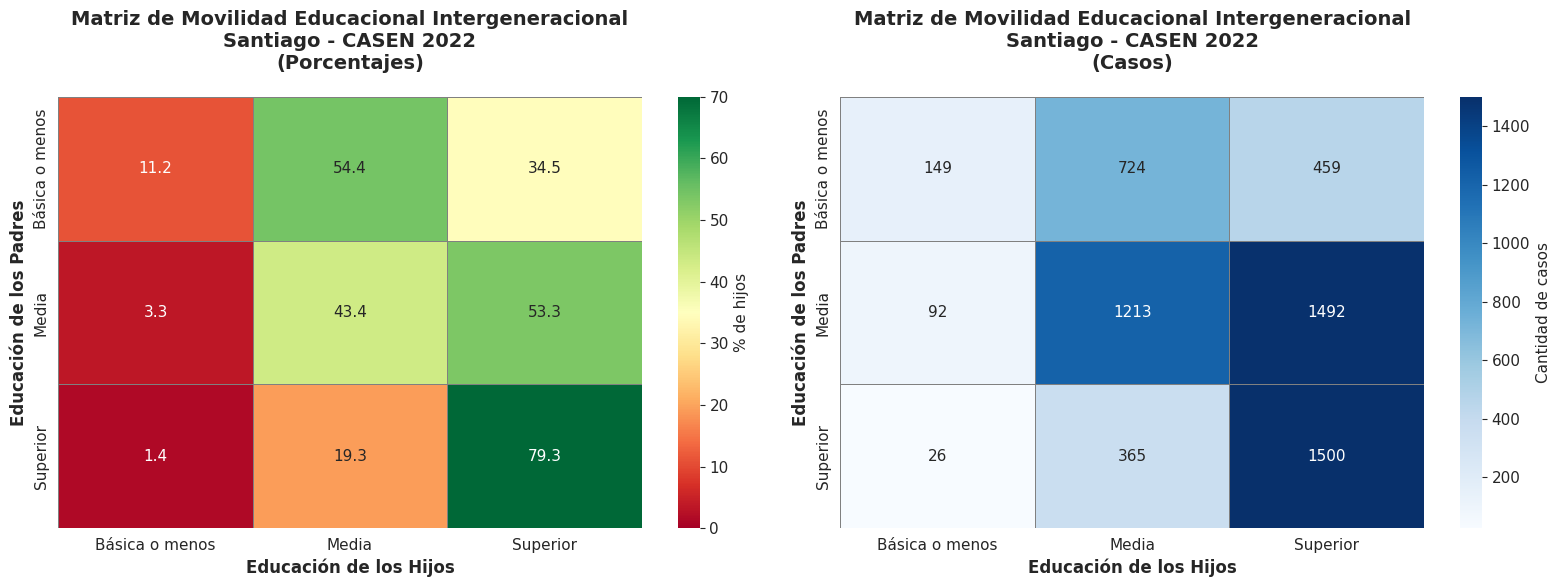


matrices guardadas en CSV


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

##configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("=" * 80)
print("MATRIZ DE MOVILIDAD EDUCACIONAL INTERGENERACIONAL")
print("=" * 80)

##crear matriz de movilidad (porcentaje por fila = por educacion del padre)
matriz_movilidad = pd.crosstab(
    df_movilidad_limpio['educ_padre_cat'],
    df_movilidad_limpio['educ_hijo_cat'],
    normalize='index'
) * 100

##reordenar columnas y filas
orden_correcto = ['Básica o menos', 'Media', 'Superior']
matriz_movilidad = matriz_movilidad.reindex(index=orden_correcto, columns=orden_correcto)

print("\nporcentaje de hijos que alcanzan cada nivel educacional,")
print("segun la educación de sus padres:\n")
print(matriz_movilidad.round(1))

##crear también la matriz en numeros absolutos
matriz_absolutos = pd.crosstab(
    df_movilidad_limpio['educ_padre_cat'],
    df_movilidad_limpio['educ_hijo_cat']
)
matriz_absolutos = matriz_absolutos.reindex(index=orden_correcto, columns=orden_correcto)

print("\n" + "=" * 80)
print("NUMEROS ABSOLUTOS (cantidad de casos):")
print("=" * 80)
print(matriz_absolutos)

##visualizacion: heatmap de la matriz de movilidad
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

##grafico 1: porcentajes
sns.heatmap(matriz_movilidad, annot=True, fmt='.1f', cmap='RdYlGn',
            cbar_kws={'label': '% de hijos'}, ax=ax1, vmin=0, vmax=70,
            linewidths=0.5, linecolor='gray')
ax1.set_title('Matriz de Movilidad Educacional Intergeneracional\nSantiago - CASEN 2022\n(Porcentajes)',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Educación de los Hijos', fontsize=12, fontweight='bold')
ax1.set_ylabel('Educación de los Padres', fontsize=12, fontweight='bold')

##grafico 2: numeros absolutos
sns.heatmap(matriz_absolutos, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Cantidad de casos'}, ax=ax2,
            linewidths=0.5, linecolor='gray')
ax2.set_title('Matriz de Movilidad Educacional Intergeneracional\nSantiago - CASEN 2022\n(Casos)',
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Educación de los Hijos', fontsize=12, fontweight='bold')
ax2.set_ylabel('Educación de los Padres', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

##guardar matriz para exportar
matriz_movilidad.to_csv('matriz_movilidad_porcentajes.csv')
matriz_absolutos.to_csv('matriz_movilidad_casos.csv')
print("\nmatrices guardadas en CSV")

In [80]:
print("=" * 80)
print("MÉTRICAS CLAVE DE MOVILIDAD EDUCACIONAL EN SANTIAGO")
print("=" * 80)

##tasas generales
print("\nTASAS GENERALES DE MOVILIDAD:\n")

tasa_reproduccion = (df_movilidad_limpio['tipo_movilidad'] == 'Reproducción').mean() * 100
tasa_ascendente = (df_movilidad_limpio['tipo_movilidad'] == 'Movilidad Ascendente').mean() * 100
tasa_descendente = (df_movilidad_limpio['tipo_movilidad'] == 'Movilidad Descendente').mean() * 100

print(f"  reproducción social:     {tasa_reproduccion:.1f}%")
print(f"    {tasa_reproduccion:.1f}% de los hijos tienen el mismo nivel educacional que sus padres")
print(f"\n  movilidad ascendente:    {tasa_ascendente:.1f}%")
print(f"    {tasa_ascendente:.1f}% de los hijos superan el nivel educacional de sus padres")
print(f"\n  movilidad descendente:   {tasa_descendente:.1f}%")
print(f"    {tasa_descendente:.1f}% de los hijos no alcanzan el nivel educacional de sus padres")

##probabilidad de acceder a educacion superior segun educacion del padre
print("\n" + "=" * 80)
print("PROBABILIDAD DE ACCEDER A EDUCACIÓN SUPERIOR")
print("=" * 80)

prob_superior_padre_basica = matriz_movilidad.loc['Básica o menos', 'Superior']
prob_superior_padre_media = matriz_movilidad.loc['Media', 'Superior']
prob_superior_padre_superior = matriz_movilidad.loc['Superior', 'Superior']

print("\nsegun educación del padre/jefe de hogar:\n")
print(f"  padre con educación BASICA o menos  -> hijo accede a superior: {prob_superior_padre_basica:.1f}%")
print(f"  padre con educación MEDIA           -> hijo accede a superior: {prob_superior_padre_media:.1f}%")
print(f"  padre con educación SUPERIOR        -> hijo accede a superior: {prob_superior_padre_superior:.1f}%")

##odds ratio (razón de probabilidades)
print("\n" + "=" * 80)
print("VENTAJA RELATIVA (ODDS RATIO)")
print("=" * 80)

odds_ratio_superior_vs_basica = prob_superior_padre_superior / prob_superior_padre_basica
odds_ratio_superior_vs_media = prob_superior_padre_superior / prob_superior_padre_media

print(f"\nun hijo de padre con educación SUPERIOR tiene:")
print(f"  {odds_ratio_superior_vs_basica:.1f} veces mas probabilidad de acceder a educación superior")
print(f"    que un hijo de padre con educación BASICA")
print(f"\n  {odds_ratio_superior_vs_media:.1f} veces mas probabilidad de acceder a educación superior")
print(f"    que un hijo de padre con educación MEDIA")

##efecto "sticky floor" (suelo pegajoso)
print("\n" + "=" * 80)
print("EFECTO 'STICKY FLOOR' (Suelo Pegajoso)")
print("=" * 80)

##padres con basica: cuantos hijos NO superan media
hijos_padre_basica = df_movilidad_limpio[df_movilidad_limpio['educ_padre_cat'] == 'Básica o menos']
sticky_floor_basica = (hijos_padre_basica['educ_hijo_cat'].isin(['Básica o menos', 'Media'])).mean() * 100

print(f"\nde los hijos de padres con educación BASICA o menos:")
print(f"  {sticky_floor_basica:.1f}% NO logra superar educación MEDIA")
print(f"    (quedan 'pegados' en los niveles educacionales bajos)")

##probabilidad de quedarse en el mismo nivel
prob_reproduccion_basica = matriz_movilidad.loc['Básica o menos', 'Básica o menos']
prob_reproduccion_media = matriz_movilidad.loc['Media', 'Media']
prob_reproduccion_superior = matriz_movilidad.loc['Superior', 'Superior']

print("\n" + "=" * 80)
print("PROBABILIDAD DE REPRODUCIR EL MISMO NIVEL")
print("=" * 80)
print(f"\n  padres BASICA    -> hijos BASICA:    {prob_reproduccion_basica:.1f}%")
print(f"  padres MEDIA     -> hijos MEDIA:     {prob_reproduccion_media:.1f}%")
print(f"  padres SUPERIOR  -> hijos SUPERIOR:  {prob_reproduccion_superior:.1f}%")

##crear dataframe de metricas para exportar
metricas_clave = pd.DataFrame({
    'Metrica': [
        'Tasa de Reproducción',
        'Tasa de Movilidad Ascendente',
        'Tasa de Movilidad Descendente',
        'Prob. Superior (Padre Basica)',
        'Prob. Superior (Padre Media)',
        'Prob. Superior (Padre Superior)',
        'Odds Ratio (Superior vs Basica)',
        'Sticky Floor (% no supera media)'
    ],
    'Valor': [
        f"{tasa_reproduccion:.1f}%",
        f"{tasa_ascendente:.1f}%",
        f"{tasa_descendente:.1f}%",
        f"{prob_superior_padre_basica:.1f}%",
        f"{prob_superior_padre_media:.1f}%",
        f"{prob_superior_padre_superior:.1f}%",
        f"{odds_ratio_superior_vs_basica:.1f}x",
        f"{sticky_floor_basica:.1f}%"
    ]
})

print("\n" + "=" * 80)
display(metricas_clave)

metricas_clave.to_csv('metricas_clave_movilidad.csv', index=False)
print("\nmetricas guardadas en CSV")

MÉTRICAS CLAVE DE MOVILIDAD EDUCACIONAL EN SANTIAGO

TASAS GENERALES DE MOVILIDAD:

  reproducción social:     47.5%
    47.5% de los hijos tienen el mismo nivel educacional que sus padres

  movilidad ascendente:    44.4%
    44.4% de los hijos superan el nivel educacional de sus padres

  movilidad descendente:   8.0%
    8.0% de los hijos no alcanzan el nivel educacional de sus padres

PROBABILIDAD DE ACCEDER A EDUCACIÓN SUPERIOR

segun educación del padre/jefe de hogar:

  padre con educación BASICA o menos  -> hijo accede a superior: 34.5%
  padre con educación MEDIA           -> hijo accede a superior: 53.3%
  padre con educación SUPERIOR        -> hijo accede a superior: 79.3%

VENTAJA RELATIVA (ODDS RATIO)

un hijo de padre con educación SUPERIOR tiene:
  2.3 veces mas probabilidad de acceder a educación superior
    que un hijo de padre con educación BASICA

  1.5 veces mas probabilidad de acceder a educación superior
    que un hijo de padre con educación MEDIA

EFECTO 'STICK

,Metrica,Valor
0,Tasa de Reproducción,47.5%
1,Tasa de Movilidad Ascendente,44.4%
2,Tasa de Movilidad Descendente,8.0%
3,Prob. Superior (Padre Basica),34.5%
4,Prob. Superior (Padre Media),53.3%
5,Prob. Superior (Padre Superior),79.3%
6,Odds Ratio (Superior vs Basica),2.3x
7,Sticky Floor (% no supera media),65.5%



metricas guardadas en CSV


ANALISIS DE MOVILIDAD POR GENERO

TIPOS DE MOVILIDAD POR GENERO DEL HIJO:



sexo_hijo_label,Hombre,Mujer
tipo_movilidad,,
Movilidad Ascendente,40.4,48.9
Movilidad Descendente,9.0,6.9
Reproducción,50.5,44.2



ACCESO A EDUCACIÓN SUPERIOR POR GENERO

porcentaje de hijos que acceden a educación SUPERIOR:
(por educación del padre y genero del hijo)



sexo_hijo_label,Hombre,Mujer
educ_padre_cat,,
Básica o menos,29.0,40.2
Media,48.3,59.0
Superior,77.4,81.6


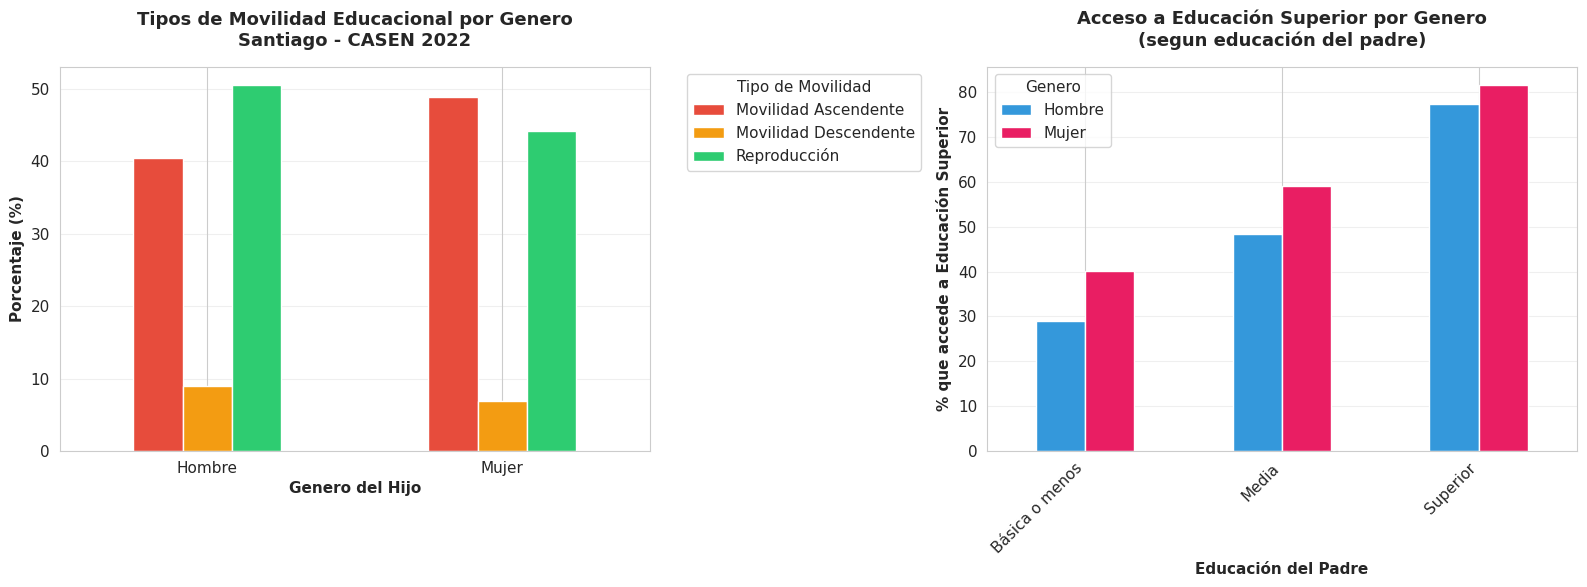


HALLAZGOS CLAVE POR GENERO

movilidad ascendente:
  hombres: 40.4%
  mujeres: 48.9%
  brecha:  8.5 puntos porcentuales
  las mujeres tienen MAYOR movilidad ascendente

datos de genero guardados en CSV


In [81]:
print("=" * 80)
print("ANALISIS DE MOVILIDAD POR GENERO")
print("=" * 80)

##movilidad general por genero
print("\nTIPOS DE MOVILIDAD POR GENERO DEL HIJO:\n")

movilidad_genero = pd.crosstab(
    df_movilidad_limpio['tipo_movilidad'],
    df_movilidad_limpio['sexo_hijo_label'],
    normalize='columns'
) * 100

display(movilidad_genero.round(1))

##acceso a educacion superior por genero y educacion del padre
print("\n" + "=" * 80)
print("ACCESO A EDUCACIÓN SUPERIOR POR GENERO")
print("=" * 80)

acceso_superior_genero = pd.crosstab(
    [df_movilidad_limpio['educ_padre_cat'], df_movilidad_limpio['sexo_hijo_label']],
    df_movilidad_limpio['educ_hijo_cat'] == 'Superior',
    normalize='index'
) * 100

##filtrar solo True (acceso a superior)
acceso_superior_genero = acceso_superior_genero[True].unstack()

print("\nporcentaje de hijos que acceden a educación SUPERIOR:")
print("(por educación del padre y genero del hijo)\n")
display(acceso_superior_genero.round(1))

##visualizacion
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

##grafico 1: movilidad por genero
movilidad_genero.T.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[0].set_title('Tipos de Movilidad Educacional por Genero\nSantiago - CASEN 2022',
                  fontsize=13, fontweight='bold', pad=15)
axes[0].set_xlabel('Genero del Hijo', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
axes[0].legend(title='Tipo de Movilidad', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

##grafico 2: acceso a superior por genero
acceso_superior_genero.plot(kind='bar', ax=axes[1], color=['#3498db', '#e91e63'])
axes[1].set_title('Acceso a Educación Superior por Genero\n(segun educación del padre)',
                  fontsize=13, fontweight='bold', pad=15)
axes[1].set_xlabel('Educación del Padre', fontsize=11, fontweight='bold')
axes[1].set_ylabel('% que accede a Educación Superior', fontsize=11, fontweight='bold')
axes[1].legend(title='Genero', labels=['Hombre', 'Mujer'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

##hallazgos clave por genero
print("\n" + "=" * 80)
print("HALLAZGOS CLAVE POR GENERO")
print("=" * 80)

##brecha de genero en movilidad ascendente
mov_asc_hombres = movilidad_genero.loc['Movilidad Ascendente', 'Hombre']
mov_asc_mujeres = movilidad_genero.loc['Movilidad Ascendente', 'Mujer']
brecha_movilidad = abs(mov_asc_mujeres - mov_asc_hombres)

print(f"\nmovilidad ascendente:")
print(f"  hombres: {mov_asc_hombres:.1f}%")
print(f"  mujeres: {mov_asc_mujeres:.1f}%")
print(f"  brecha:  {brecha_movilidad:.1f} puntos porcentuales")

if mov_asc_mujeres > mov_asc_hombres:
    print(f"  las mujeres tienen MAYOR movilidad ascendente")
else:
    print(f"  los hombres tienen MAYOR movilidad ascendente")

##guardar datos
acceso_superior_genero.to_csv('acceso_superior_por_genero.csv')
movilidad_genero.to_csv('movilidad_por_genero.csv')
print("\ndatos de genero guardados en CSV")

ANALISIS DE MOVILIDAD POR NIVEL SOCIOECONOMICO

TIPOS DE MOVILIDAD POR QUINTIL DE INGRESO:



tipo_movilidad,Movilidad Ascendente,Movilidad Descendente,Reproducción
quintil_ingreso,,,
Q1 (Más pobre),55.1,6.6,38.3
Q2,48.8,8.3,42.9
Q3,51.8,8.8,39.4
Q4,43.4,7.2,49.4
Q5 (Más rico),23.1,9.1,67.8



ACCESO A EDUCACIÓN SUPERIOR POR QUINTIL

porcentaje que accede a educación superior por quintil:

  Q1 (Más pobre): 44.8%
  Q2: 46.8%
  Q3: 50.5%
  Q4: 62.4%
  Q5 (Más rico): 82.1%


/tmp/ipython-input-4028195110.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceso_por_quintil = df_movilidad_limpio.groupby('quintil_ingreso').apply(
/tmp/ipython-input-4028195110.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acceso_por_quintil = df_movilidad_limpio.groupby('quintil_ingreso').apply(


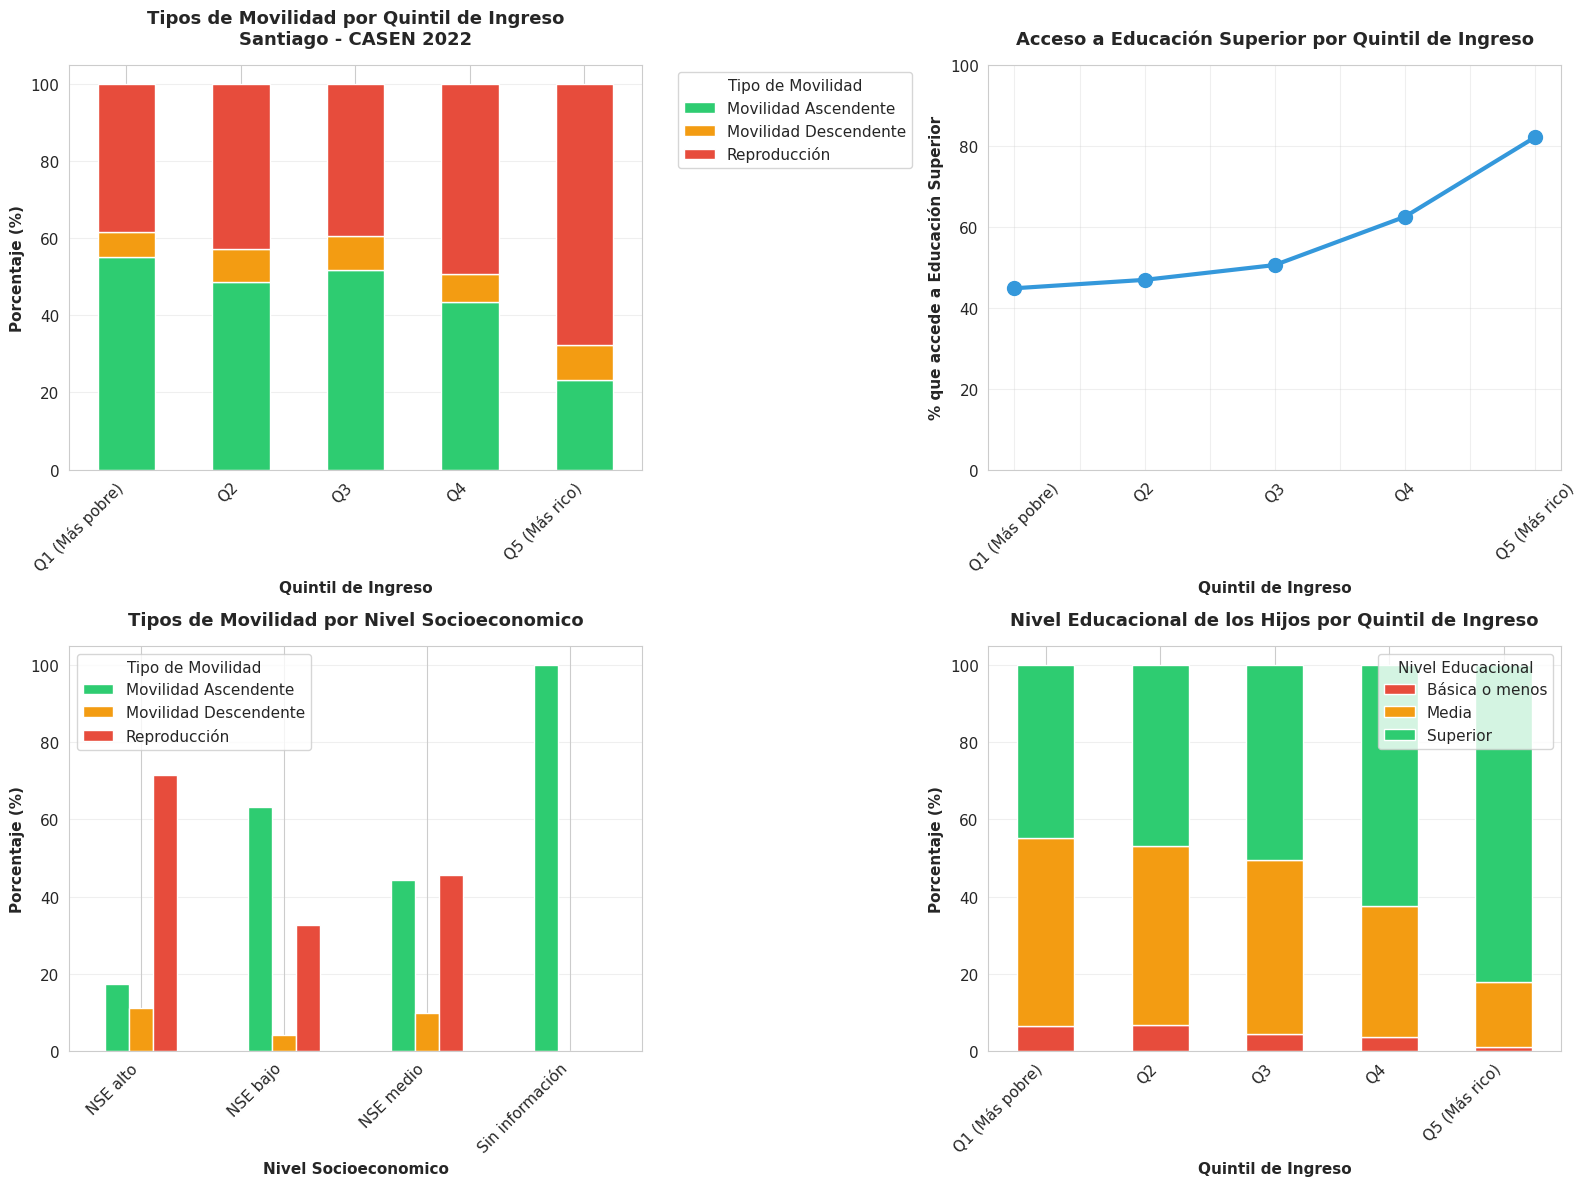


HALLAZGOS CLAVE POR NIVEL SOCIOECONOMICO

brecha de acceso a educación superior entre quintiles:
  Q5 (mas rico):  82.1%
  Q1 (mas pobre): 44.8%
  brecha:         37.3 puntos porcentuales

un joven del quintil mas rico tiene 1.8 veces mas
probabilidad de acceder a educación superior que uno del quintil mas pobre

datos socioeconomicos guardados en CSV:
  movilidad_por_quintil.csv
  acceso_superior_por_quintil.csv
  movilidad_por_nse.csv


In [82]:
print("=" * 80)
print("ANALISIS DE MOVILIDAD POR NIVEL SOCIOECONOMICO")
print("=" * 80)

##movilidad por quintil de ingreso
print("\nTIPOS DE MOVILIDAD POR QUINTIL DE INGRESO:\n")

movilidad_quintil = pd.crosstab(
    df_movilidad_limpio['quintil_ingreso'],
    df_movilidad_limpio['tipo_movilidad'],
    normalize='index'
) * 100

display(movilidad_quintil.round(1))

##acceso a superior por quintil de ingreso
print("\n" + "=" * 80)
print("ACCESO A EDUCACIÓN SUPERIOR POR QUINTIL")
print("=" * 80)

acceso_por_quintil = df_movilidad_limpio.groupby('quintil_ingreso').apply(
    lambda x: (x['educ_hijo_cat'] == 'Superior').mean() * 100
).sort_index()

print("\nporcentaje que accede a educación superior por quintil:\n")
for quintil, porcentaje in acceso_por_quintil.items():
    print(f"  {quintil}: {porcentaje:.1f}%")

##visualizacion
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

##grafico 1: movilidad por quintil (barras apiladas)
movilidad_quintil.plot(kind='bar', stacked=True, ax=axes[0,0],
                       color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0,0].set_title('Tipos de Movilidad por Quintil de Ingreso\nSantiago - CASEN 2022',
                    fontsize=13, fontweight='bold', pad=15)
axes[0,0].set_xlabel('Quintil de Ingreso', fontsize=11, fontweight='bold')
axes[0,0].set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
axes[0,0].legend(title='Tipo de Movilidad', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
axes[0,0].grid(axis='y', alpha=0.3)

##grafico 2: acceso a superior por quintil (linea)
acceso_por_quintil.plot(kind='line', ax=axes[0,1], marker='o', linewidth=3,
                        markersize=10, color='#3498db')
axes[0,1].set_title('Acceso a Educación Superior por Quintil de Ingreso',
                    fontsize=13, fontweight='bold', pad=15)
axes[0,1].set_xlabel('Quintil de Ingreso', fontsize=11, fontweight='bold')
axes[0,1].set_ylabel('% que accede a Educación Superior', fontsize=11, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(alpha=0.3)
axes[0,1].set_ylim([0, 100])

##grafico 3: movilidad por NSE
movilidad_nse = pd.crosstab(
    df_movilidad_limpio['nse'],
    df_movilidad_limpio['tipo_movilidad'],
    normalize='index'
) * 100

movilidad_nse.plot(kind='bar', ax=axes[1,0],
                   color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[1,0].set_title('Tipos de Movilidad por Nivel Socioeconomico',
                    fontsize=13, fontweight='bold', pad=15)
axes[1,0].set_xlabel('Nivel Socioeconomico', fontsize=11, fontweight='bold')
axes[1,0].set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
axes[1,0].legend(title='Tipo de Movilidad')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].grid(axis='y', alpha=0.3)

##grafico 4: distribución de educación hijo por quintil
educacion_quintil = pd.crosstab(
    df_movilidad_limpio['quintil_ingreso'],
    df_movilidad_limpio['educ_hijo_cat'],
    normalize='index'
) * 100

educacion_quintil[['Básica o menos', 'Media', 'Superior']].plot(
    kind='bar', stacked=True, ax=axes[1,1],
    color=['#e74c3c', '#f39c12', '#2ecc71']
)
axes[1,1].set_title('Nivel Educacional de los Hijos por Quintil de Ingreso',
                    fontsize=13, fontweight='bold', pad=15)
axes[1,1].set_xlabel('Quintil de Ingreso', fontsize=11, fontweight='bold')
axes[1,1].set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
axes[1,1].legend(title='Nivel Educacional')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha='right')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

##hallazgos clave
print("\n" + "=" * 80)
print("HALLAZGOS CLAVE POR NIVEL SOCIOECONOMICO")
print("=" * 80)

brecha_q5_q1 = acceso_por_quintil.iloc[-1] - acceso_por_quintil.iloc[0]

print(f"\nbrecha de acceso a educación superior entre quintiles:")
print(f"  Q5 (mas rico):  {acceso_por_quintil.iloc[-1]:.1f}%")
print(f"  Q1 (mas pobre): {acceso_por_quintil.iloc[0]:.1f}%")
print(f"  brecha:         {brecha_q5_q1:.1f} puntos porcentuales")

##ratio de acceso
ratio_q5_q1 = acceso_por_quintil.iloc[-1] / acceso_por_quintil.iloc[0]
print(f"\nun joven del quintil mas rico tiene {ratio_q5_q1:.1f} veces mas")
print(f"probabilidad de acceder a educación superior que uno del quintil mas pobre")

##guardar datos
movilidad_quintil.to_csv('movilidad_por_quintil.csv')
acceso_por_quintil.to_csv('acceso_superior_por_quintil.csv')
movilidad_nse.to_csv('movilidad_por_nse.csv')

print("\ndatos socioeconomicos guardados en CSV:")
print("  movilidad_por_quintil.csv")
print("  acceso_superior_por_quintil.csv")
print("  movilidad_por_nse.csv")

In [83]:
print("=" * 80)
print("RESUMEN EJECUTIVO DE HALLAZGOS")
print("EL PESO DE LA CUNA: REPRODUCCIÓN INTERGENERACIONAL DE CAPITAL EDUCATIVO")
print("=" * 80)

print("\n1. REPRODUCCIÓN DEL CAPITAL EDUCATIVO")
print("-" * 80)
print(f"  • {tasa_reproduccion:.1f}% de reproducción social en Santiago")
print(f"  • El {prob_reproduccion_superior:.1f}% de hijos de padres con educación superior")
print(f"    también alcanzan educación superior (alta reproducción)")
print(f"  • Solo el {prob_superior_padre_basica:.1f}% de hijos de padres con educación basica")
print(f"    logra acceder a educación superior")

print("\n2. DESIGUALDAD DE OPORTUNIDADES")
print("-" * 80)
print(f"  • Un hijo de padre con educación superior tiene {odds_ratio_superior_vs_basica:.1f}x mas")
print(f"    probabilidad de acceder a educación superior")
print(f"  • Brecha por quintil de ingreso: {brecha_q5_q1:.1f} puntos porcentuales")
print(f"    (Q5: {acceso_por_quintil.iloc[-1]:.1f}% vs Q1: {acceso_por_quintil.iloc[0]:.1f}%)")

print("\n3. EFECTO 'STICKY FLOOR'")
print("-" * 80)
print(f"  • {sticky_floor_basica:.1f}% de hijos de padres con educación basica")
print(f"    NO logra superar educación media")
print(f"  • Existe un 'suelo pegajoso' que dificulta la movilidad ascendente")
print(f"    desde los niveles educacionales mas bajos")

print("\n4. BRECHA DE GENERO")
print("-" * 80)
print(f"  • Las mujeres tienen {brecha_movilidad:.1f} puntos porcentuales MAS de movilidad ascendente")
print(f"  • Hombres: {mov_asc_hombres:.1f}% | Mujeres: {mov_asc_mujeres:.1f}%")
print(f"  • Las mujeres acceden mas a educación superior en TODOS los niveles")
print(f"    socioeconómicos")

print("\n5. CONCLUSIÓN PRINCIPAL")
print("-" * 80)
print("  La educación del padre/jefe de hogar es un FUERTE PREDICTOR del logro")
print("  educacional de los hijos en Santiago, confirmando la teoria de Bourdieu")
print("  sobre reproducción del capital cultural.")
print("\n  La movilidad educacional ascendente existe (44.4%), pero es LIMITADA")
print("  para quienes provienen de hogares con menor capital educativo.")

print("\n" + "=" * 80)

RESUMEN EJECUTIVO DE HALLAZGOS
EL PESO DE LA CUNA: REPRODUCCIÓN INTERGENERACIONAL DE CAPITAL EDUCATIVO

1. REPRODUCCIÓN DEL CAPITAL EDUCATIVO
--------------------------------------------------------------------------------
  • 47.5% de reproducción social en Santiago
  • El 79.3% de hijos de padres con educación superior
    también alcanzan educación superior (alta reproducción)
  • Solo el 34.5% de hijos de padres con educación basica
    logra acceder a educación superior

2. DESIGUALDAD DE OPORTUNIDADES
--------------------------------------------------------------------------------
  • Un hijo de padre con educación superior tiene 2.3x mas
    probabilidad de acceder a educación superior
  • Brecha por quintil de ingreso: 37.3 puntos porcentuales
    (Q5: 82.1% vs Q1: 44.8%)

3. EFECTO 'STICKY FLOOR'
--------------------------------------------------------------------------------
  • 65.5% de hijos de padres con educación basica
    NO logra superar educación media
  • Existe un '

In [85]:
from google.colab import files

print("=" * 80)
print("EXPORTANDO DATOS PARA LOOKER STUDIO")
print("=" * 80)

##dataset principal (el mas importante)
df_export = df_movilidad_limpio[[
    'id_vivienda',
    'id_persona',
    'edad',
    'sexo_hijo_label',
    'esc',
    'educ_hijo_cat',
    'edad_padre',
    'sexo_padre_label',
    'esc_padre',
    'educ_padre_cat',
    'tipo_movilidad',
    'ytotcorh',
    'ypc_calculado',
    'quintil_ingreso',
    'nse',
    'area_label',
    'pobreza_label',
    'n_miembros'
]].copy()

##renombrar columnas a español claro para Looker
df_export.columns = [
    'ID_Vivienda',
    'ID_Persona',
    'Edad_Hijo',
    'Sexo_Hijo',
    'Años_Escolaridad_Hijo',
    'Educacion_Hijo',
    'Edad_Padre',
    'Sexo_Padre',
    'Años_Escolaridad_Padre',
    'Educacion_Padre',
    'Tipo_Movilidad',
    'Ingreso_Hogar',
    'Ingreso_PerCapita',
    'Quintil_Ingreso',
    'Nivel_Socioeconomico',
    'Area',
    'Situacion_Pobreza',
    'Miembros_Hogar'
]

##exportar
df_export.to_csv('CASEN_Movilidad_Educacional_Santiago_FINAL.csv',
                 index=False, encoding='utf-8-sig')

print(f"\ndataset principal exportado: {len(df_export):,} registros")
print(f"archivo: CASEN_Movilidad_Educacional_Santiago_FINAL.csv")
print(f"variables: {len(df_export.columns)}")

##descargar el archivo
files.download('CASEN_Movilidad_Educacional_Santiago_FINAL.csv')

print("\n" + "=" * 80)
print("ARCHIVOS CSV GENERADOS:")
print("=" * 80)
print("\n1. CASEN_Movilidad_Educacional_Santiago_FINAL.csv")
print("   -> dataset principal con todos los casos (6,020 registros)")
print("\n2. matriz_movilidad_porcentajes.csv")
print("   -> matriz de movilidad educacional (porcentajes)")
print("\n3. matriz_movilidad_casos.csv")
print("   -> matriz de movilidad educacional (numeros absolutos)")
print("\n4. metricas_clave_movilidad.csv")
print("   -> metricas principales (odds ratio, tasas, etc.)")
print("\n5. acceso_superior_por_genero.csv")
print("   -> acceso a educación superior por genero")
print("\n6. movilidad_por_genero.csv")
print("   -> tipos de movilidad por genero")
print("\n7. movilidad_por_quintil.csv")
print("   -> tipos de movilidad por quintil de ingreso")
print("\n8. acceso_superior_por_quintil.csv")
print("   -> acceso a educación superior por quintil")
print("\n9. movilidad_por_nse.csv")
print("   -> tipos de movilidad por nivel socioeconomico")


EXPORTANDO DATOS PARA LOOKER STUDIO

dataset principal exportado: 6,020 registros
archivo: CASEN_Movilidad_Educacional_Santiago_FINAL.csv
variables: 18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ARCHIVOS CSV GENERADOS:

1. CASEN_Movilidad_Educacional_Santiago_FINAL.csv
   -> dataset principal con todos los casos (6,020 registros)

2. matriz_movilidad_porcentajes.csv
   -> matriz de movilidad educacional (porcentajes)

3. matriz_movilidad_casos.csv
   -> matriz de movilidad educacional (numeros absolutos)

4. metricas_clave_movilidad.csv
   -> metricas principales (odds ratio, tasas, etc.)

5. acceso_superior_por_genero.csv
   -> acceso a educación superior por genero

6. movilidad_por_genero.csv
   -> tipos de movilidad por genero

7. movilidad_por_quintil.csv
   -> tipos de movilidad por quintil de ingreso

8. acceso_superior_por_quintil.csv
   -> acceso a educación superior por quintil

9. movilidad_por_nse.csv
   -> tipos de movilidad por nivel socioeconomico
